 # Tidal Analysis - Interpolation 


Here's a quick guide on how to interpolate a tide dataset to a specific time frequency. The interpolated data can then be used to generate tide constituents in MIKE software.

Please note that the data must be in UTC if you plan to implement it in MIKE software.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from pandas import datetime

In [ ]:
file = "Data/Staq_Island_station/Annual_Predictions_Stag Island_2020.csv"
df= pd.read_csv(file)

df['Date and time (UTC)']= pd.to_datetime(df['Date and time (UTC)'])
df['next_time'] = pd.to_datetime(df['Date and time (UTC)'].shift(1))
df['Time difference'] = df['Date and time (UTC)'] - df['next_time']
df

# 1 year

In [ ]:
df= pd.read_csv(file, index_col=0, parse_dates=True)

water_level = df['Metres']['2020-01-01':]
x = water_level.plot(figsize=(13, 3.5))

# Q1 year

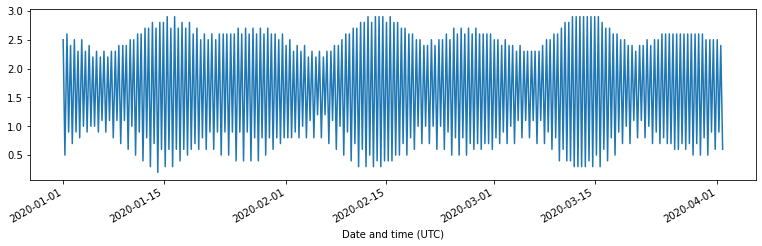

In [4]:
water_level = df['Metres']['2020-01-01':'2020-04-01']
x = water_level.plot(figsize=(13, 3.5))

# 5 days

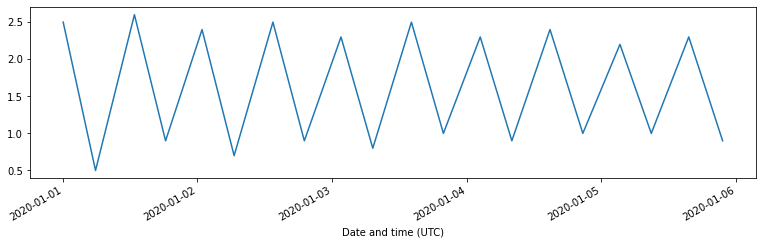

In [5]:
water_level = df['Metres']['2020-01-01':'2020-01-05']
x = water_level.plot(figsize=(13, 3.5))

# Timeseries interpolation 

/tmp/ipykernel_22614/3651033701.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(file, header=0, parse_dates=[0], index_col=0, squeeze=True)


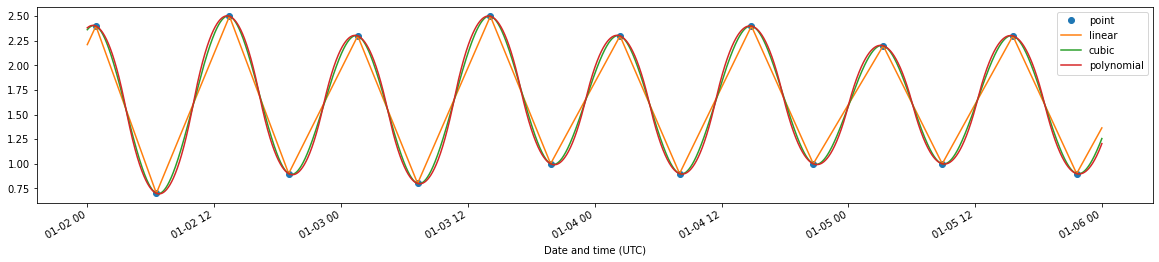

In [6]:

date_start= '2020-01-02'
date_end = '2020-01-05'
 
df = pd.read_csv(file, header=0, parse_dates=[0], index_col=0, squeeze=True) 
df = pd.DataFrame(df)

df_cubic = df.resample('1Min').first().interpolate(method='cubic')
df_cubic = pd.DataFrame(df_cubic)

df_linear = df.resample('1Min').first().interpolate(method='linear')
df_linear = pd.DataFrame(df_linear)

df_polynomial = df.resample('1Min').first().interpolate(method='polynomial', order=2)
df_polynomial = pd.DataFrame(df_polynomial)

plt.figure().set_figwidth(20)

plt.plot(df['Metres'][date_start:date_end], 'o')
df_linear['Metres'][date_start:date_end].plot()
df_cubic['Metres'][date_start:date_end].plot()
df_polynomial['Metres'][date_start:date_end].plot()

plt.legend(['point', 'linear', 'cubic', 'polynomial'], loc = 'best')
plt.show()


# Save data

In [7]:
out_path = os.path.join('{}_cubic_interpolated.csv'.format(file.split('\\')[-1][:-4]))
df_cubic.to_csv(out_path,index=True, float_format='%.2f')